# Geocoder API

In [1]:
!pip install geocoder

In [2]:
import geocoder

In [3]:
g = geocoder.arcgis('Minsk')
g.json

{'address': 'Minsk',
 'bbox': {'northeast': [54.04074000000003, 27.70246000000003],
  'southwest': [53.76674000000003, 27.42846000000003]},
 'confidence': 1,
 'lat': 53.90374000000003,
 'lng': 27.56546000000003,
 'ok': True,
 'quality': 'Locality',
 'raw': {'name': 'Minsk',
  'extent': {'xmin': 27.42846000000003,
   'ymin': 53.76674000000003,
   'xmax': 27.70246000000003,
   'ymax': 54.04074000000003},
  'feature': {'geometry': {'x': 27.56546000000003, 'y': 53.90374000000003},
   'attributes': {'Score': 100, 'Addr_Type': 'Locality'}}},
 'score': 100,
 'status': 'OK'}

In [4]:
import requests

In [5]:
lat = g.json['lat']
lng = g.json['lng']

In [6]:
r = requests.get(f'https://api.sunrise-sunset.org/json?lat={lat}&lng={lng}&date=2020-09-27')

In [7]:
r.json()

{'results': {'sunrise': '4:06:07 AM',
  'sunset': '3:54:42 PM',
  'solar_noon': '10:00:24 AM',
  'day_length': '11:48:35',
  'civil_twilight_begin': '3:31:07 AM',
  'civil_twilight_end': '4:29:42 PM',
  'nautical_twilight_begin': '2:49:50 AM',
  'nautical_twilight_end': '5:10:58 PM',
  'astronomical_twilight_begin': '2:07:02 AM',
  'astronomical_twilight_end': '5:53:47 PM'},
 'status': 'OK'}

In [8]:
r.json()['results']['sunrise']

'4:06:07 AM'

# Библиотеки для работы с API Vk

https://vk-api.readthedocs.io/en/latest/

https://github.com/python273/vk_api

https://pypi.org/project/vk-api/

https://habr.com/ru/post/319178/

In [9]:
!pip install vk_api

In [10]:
import vk_api
import json

In [11]:
with open('./../data/vk_credentials.txt', 'r') as c:
    login, password = c.read().strip().split(';')

In [12]:
print(login, password)

+375291447680 nika-esya


In [13]:
vk_session = vk_api.VkApi(login, password)
vk_session.auth()

In [14]:
vk = vk_session.get_api()

In [15]:
# VK documentation: https://vk.com/dev/wall
result = vk.wall.get(owner_id=-1)

In [16]:
result

{'count': 319070,
 'items': [{'id': 395479,
   'from_id': -1,
   'owner_id': -1,
   'date': 1600443092,
   'marked_as_ads': 0,
   'post_type': 'post',
   'text': 'Еще больше новостей для создателей чат-ботов: в методе [https://vk.com/dev/messages.send|messages.send] появился параметр content_source. Параметр предназначен для указания источника пользовательского контента. Он поможет избежать блокировки сообщества, если пользовательский контент окажется запрещенным. Подробнее в [https://vk.com/dev/bots_docs_2?f=3.3.%20%D0%A1%D0%BE%D0%BE%D0%B1%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%20%D1%81%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%BC%20%D0%BA%D0%BE%D0%BD%D1%82%D0%B5%D0%BD%D1%82%D0%BE%D0%BC|документации].',
   'post_source': {'type': 'vk'},
   'comments': {'count': 25, 'can_post': 1, 'groups_can_post': True},
   'likes': {'count': 87, 'user_likes': 0, 'can_like': 1, 'can_publish': 1},
   'reposts': {'count': 1,
    'wall_count': 0,
    'mail_co

In [17]:
result['items'][0].keys()

dict_keys(['id', 'from_id', 'owner_id', 'date', 'marked_as_ads', 'post_type', 'text', 'post_source', 'comments', 'likes', 'reposts', 'views', 'is_favorite'])

In [18]:
# get first 10 count
for i in range(10):
    print(result['items'][i]['comments']['count'])

25
82
93
35
83
34
18
25
48
52


In [19]:
tools = vk_api.VkTools(vk_session)

In [20]:
wall = tools.get_all('wall.get', 100, {'owner_id': 1})
wall['items'][:2]

[{'id': 2442097,
  'from_id': 1,
  'owner_id': 1,
  'date': 1525805964,
  'post_type': 'post',
  'text': 'Иногда говорят, что Telegram был заблокирован в России, так как “закон есть закон”. Однако Telegram заблокирован в России как раз вопреки главному закону страны – Конституции. Решения судов и законы, противоречащие Конституции, не имеют силы. А это значит, что и сама блокировка Telegram незаконна. \n\nЕсли бы ФСБ ограничилась запросом информации о нескольких террористах, то ее требование вписывалось бы в рамки Конституции. Однако речь идет о передаче универсальных ключей шифрования с целью последующего бесконтрольного доступа к переписке неограниченного круга лиц. A это – прямое нарушение 23-й статьи Конституции о праве каждого на тайну переписки.\n\nПо этой причине юристы из “Агоры” сегодня обжаловали решение Верховного суда России о законности приказа ФСБ. Надеюсь, власти России откажутся от языка неисполнимых ультиматумов, на котором сегодня ведется диалог с технологическими ком

### Структура проекта для анализа групп вконтакте

1) Получить список групп по поисковому запросу

2) Получить название групп, их направленность и количество подписчиков

In [21]:
def get_by_query(length=10, q='python'):
    """Получить список групп по поисковому запросу"""
    
    response = vk.groups.search(q=q)
    groups = [response['items'][i]['id'] for i in range(length)]
    
    return groups


def  get_group_info(group_ids):
    """Получить название групп, их направленность и количество подписчиков"""
    
    response = vk.groups.getById(group_ids=group_ids, fields='members_count,activity')
    
    return response

In [22]:
groups = get_by_query()
print(groups)

[42565717, 38080744, 152111071, 142410745, 69235007, 178774705, 104152316, 3183750, 194071621, 11899736]


In [23]:
groups_info = get_group_info(groups)

## Pandas

In [24]:
import pandas as pd

In [25]:
groups_df = pd.DataFrame(groups_info)
# groups_df.set_index('name', inplace=True)

display(groups_df)

,id,name,screen_name,is_closed,type,is_admin,is_member,is_advertiser,members_count,activity,photo_50,photo_100,photo_200
0,42565717,Python,club42565717,0,group,0,0,0,47253,Open group,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...
1,38080744,Python community,python_community,0,group,0,0,0,25311,Open group,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...
2,152111071,Python,python_django_programirovanie,0,group,0,0,0,11058,Open group,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...
3,142410745,Python 3.8 | ЯПрограммист,open_sourcecode,0,page,0,0,0,27672,Programming,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...
4,69235007,Python,python_imkn,0,group,0,0,0,934,Open group,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...
5,178774705,"Языки программирования: Python, Java, JS, PHP…",pryaz,0,page,0,0,0,35934,Education,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...
6,104152316,Введение в программирование на языке Python,pythonintro,1,group,0,0,0,14,Closed group,https://sun9-76.userapi.com/impf/c623723/v6237...,https://sun9-76.userapi.com/impf/c623723/v6237...,https://sun9-76.userapi.com/impf/c623723/v6237...
7,3183750,"Веб программист - PHP, JS, Python, Java, HTML 5",php2all,0,page,0,0,0,130324,Programming,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...,https://sun1.beltelecom-by-minsk.userapi.com/i...
8,194071621,IT-куб. Арзамас,itcube152,0,group,0,0,0,1115,Open group,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...
9,11899736,"Видеоуроки программиста PHP,Javascript,Python,С#",programl,0,page,0,0,0,25922,Programming,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...,https://sun2.beltelecom-by-minsk.userapi.com/i...


# Charts:

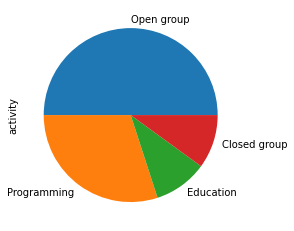

In [26]:
groups_df['activity'].value_counts().plot(kind='pie')

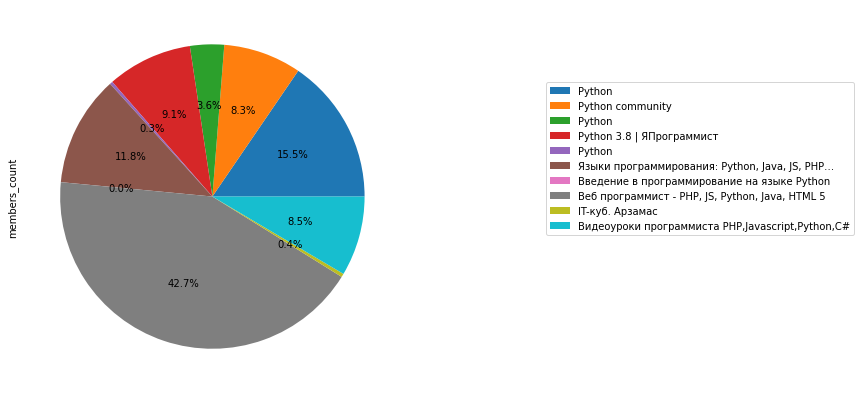

In [27]:
pie = groups_df.plot(kind='pie', y='members_count', figsize=(7,7), labels=None, autopct='%1.1f%%')
labels = groups_df['name'].tolist()
# labels = groups_df.index
pie.legend(labels, loc='center right', bbox_to_anchor=(2.2, 0.6))

In [28]:
from matplotlib import pyplot as plt
import numpy as np

Text(0.5, 0, '')

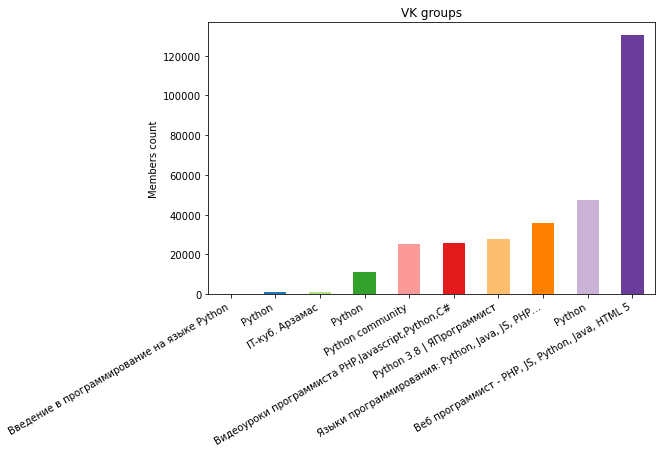

In [29]:
ax = groups_df.sort_values(['members_count']).plot.bar(x='name', y='members_count', figsize=(8,5), legend=False, color=plt.cm.Paired(np.arange(len(groups_df))))
plt.xticks(rotation=30, ha='right')
plt.title("VK groups")
plt.ylabel("Members count")
plt.xlabel("")